In [127]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [128]:
def misclassified(trainSet, labelSet, w):
    predictedLabel = np.sign(np.dot(trainSet, np.transpose(w)))
    predictedResult = [a == b for a,b in zip(predictedLabel, labelSet)]
    misclassifiedIndex = [index for index, value in enumerate(predictedResult) if value == False]
    return misclassifiedIndex

In [129]:
def PLA(training_set,maxIteration):
    df = training_set.copy()
    
    #add x_0 = 1, the bias 
    df['bias'] = [1] * training_set.shape[0]
    col_list = [df.columns[-1]] 
    col_list.extend(df.columns.tolist()[:-2])
    col_list.append(df.columns.tolist()[-2])
    
    df = df[col_list]
    
    pointSet = np.array(df.iloc[:,:-1])
    labelSet = np.array(df.iloc[:,-1])
    
    errors = []
    
    n = len(pointSet[0])
    w = np.zeros([1,n]) 
    #print "w_initial = ", w
    counter = 0
    
    for i in xrange(maxIteration):
        misclassifiedIndex = misclassified(pointSet, labelSet, w)
        errors.append(len(misclassifiedIndex)/float(training_set.shape[0]))
        #print misclassifiedIndex
        if misclassifiedIndex: 
            theChosenOne = random.choice(misclassifiedIndex)
            point = pointSet[theChosenOne].reshape(1,n)
            label = labelSet[theChosenOne].reshape(1,1)
            #if np.sign(np.dot(point, np.transpose(w))) != label:
            #print label
            #print point
            #print w, label*point
            w = w + label*point
            #print "w_{0} = {1}".format(i,w)
            counter += 1 
            #print len(misclassifiedIndex)/float(training_set.shape[0])
            #df.plot(kind='scatter',x='x',y='y', c='Value')
            #l = np.arange(-1,9)
            #ymin, ymax = plt.ylim()
            #a = -w[0][0]/w[0][1]
            #xx = np.linspace(-1,7)
            #xx = np.linspace(ymin,ymax).reshape(50,1)
            #yy = a*xx - w[0][1]/w[0][1]
            #print xx.shape
            #print yy.shape
            #plt.plot(yy,xx, 'k-')
            #plt.plot(point[0][0],point[0][1],'ro')
            #plt.show()
        else: 
            break
       
    predictedLabel = np.sign(np.dot(pointSet, np.transpose(w)))
    E_in = sum([a!=b for a,b in zip(predictedLabel, labelSet)])/float(len(predictedLabel))
    
    # Plot the original data
    colormap = np.array(['b','b' ,'r'])
    plt.scatter(df.x, df.y, c=colormap[df.Value], s=40)

    # Output the values
    print "Coefficient 0 " + str(w[0,1])
    print "Coefficient 1 " + str(w[0,2])
    print "Bias " + str(w[0])

    # Calc the hyperplane (decision boundary)
    ymin, ymax = plt.ylim()
    #w = net.coef_[0]
    a = -w[0,1] / w[0,2]
    xx = np.linspace(ymin, ymax)
    yy = a * xx - w[0,0]/w[0,2]

    # Plot the line
    plt.plot(xx,yy, 'k-')

    #for predict, real in zip(predictedLabel, labelSet):
        #print predict,real
    
    return E_in, counter, w, errors

Create data frame

In [130]:
df = pd.read_csv('A et B.txt', sep=' ', header=None)
df.columns = ['x','y','Value']
df.head()

,x,y,Value
0,"0,2","4,839161656",A
1,"0,4","5,043697771",A
2,"0,6","4,548758355",A
3,"0,8","3,626296189",A
4,1,"3,777023723",A


In [131]:
def str_to_float(df): 
    new_df = df.copy()
    return new_df.applymap(lambda x: float(x.replace(',','.')))

In [132]:
def binary_code(df): #1 for A, -1 for B
    new_df = df.copy()
    return new_df.apply(lambda x: 1 if x == 'A' else -1)

In [133]:
first_2_col = str_to_float(df.iloc[:,:-1])
value_col = binary_code(df.iloc[:,-1])
df.iloc[:,:-1] = first_2_col
df.iloc[:,-1] = value_col

In [134]:
df = df.iloc[np.random.permutation(len(df))].reset_index(drop=True)

Coefficient 0 -122.8
Coefficient 1 -65.473600039
Bias [392.0 -122.79999999985313 -65.47360003900731]


array([ 0.18333333])

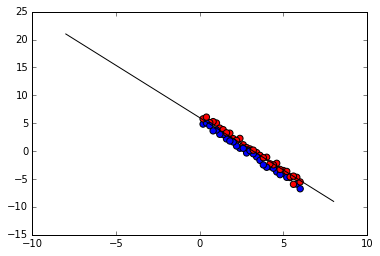

In [135]:
E_in, counter, w, errors = PLA(training_set=df, maxIteration=100000)
E_in